# Prepare waveform data

This notebook creates waveform data.

In [1]:
!pip install obspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 13.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.7/622.7 kB 32.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
import obspy
import numpy as np

## Get an earthquake waveform

In [3]:
# Create a client to connect to the SCEDC data center
client = Client("SCEDC")

# download a SCEDC earthquake catalog using obspy
starttime = obspy.UTCDateTime("2016-01-01")
endtime = obspy.UTCDateTime("2020-01-01")
minlatitude = 32.0
minlongitude = -125.0
maxlatitude = 42.0
maxlongitude = -114.0
minmagnitude = 6
quake_catalog = client.get_events(starttime=starttime,\
             endtime=endtime, minlatitude=minlatitude, \
                minlongitude=minlongitude, maxlatitude=maxlatitude, \
                    maxlongitude=maxlongitude, minmagnitude=minmagnitude)
print(quake_catalog)

2 Event(s) in Catalog:
2019-07-06T03:19:53.040000Z | +35.770, -117.599 | 7.1  Mw | manual
2019-07-04T17:33:49.000000Z | +35.705, -117.504 | 6.4  Mw | manual


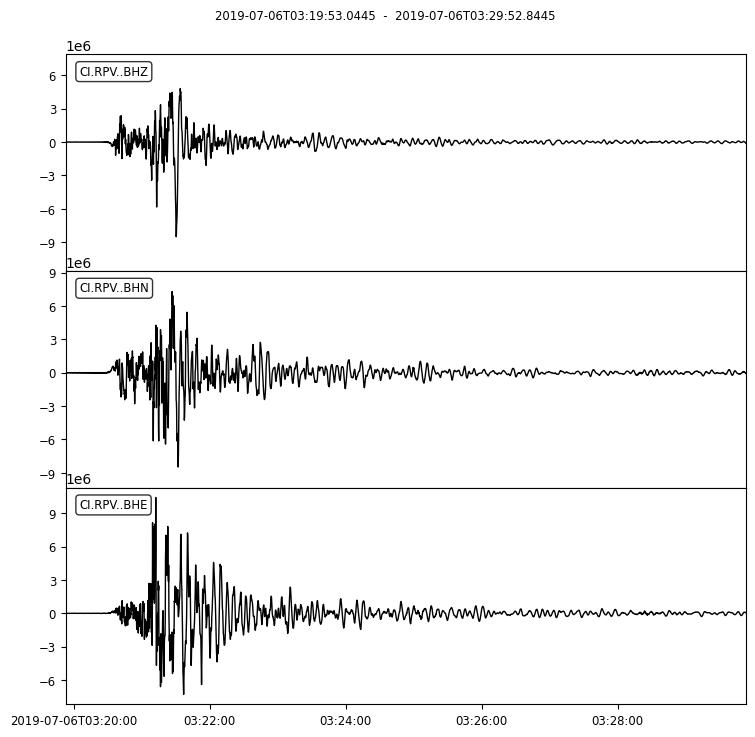

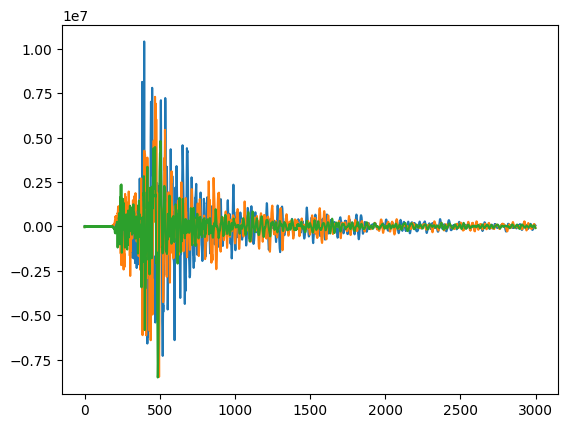

In [4]:
# get a seismogram from CI.RPV..BHZ for the large earthquake in the first element of quake_catalog
event = quake_catalog[0]
origin = event.origins[0]
# convert the origin time to a UTCDateTime object
event_time = obspy.UTCDateTime(origin.time)
z=client.get_waveforms("CI", "RPV", "", "BH*", event_time, event_time + 60*10)
# downsample to df Hz

df = 5
z.resample(df)
z.plot()
data = np.zeros(shape=(3, len(z[0].data)))
data[0] = z[0].data
data[1] = z[1].data
data[2] = z[2].data
plt.plot(data.T)


[0.000e+00 2.000e-01 4.000e-01 ... 5.994e+02 5.996e+02 5.998e+02]


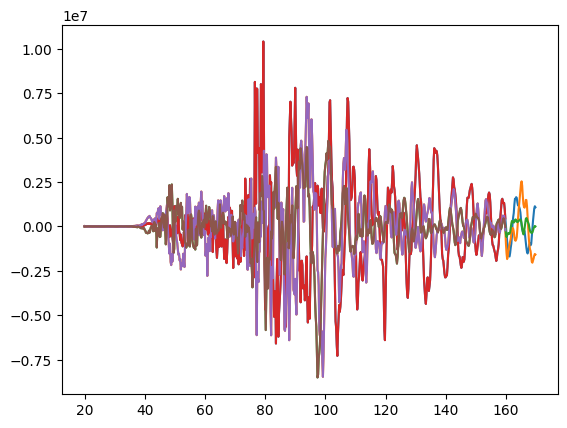

In [5]:
# now we are going to reshape the data into a format that can be used by the ChronosPipeline
# data = np.expand_dims(data, axis=0)
prediction_length = int(10*df)
last_date = int(160*df)
start_date = int(20*df)
#create a time vector with sampling rate 
time = z[0].times()

print(time)

plt.plot(time[start_date:last_date+prediction_length],data[:,start_date:last_date+prediction_length].T)
plt.plot(time[start_date:last_date],data[:,start_date:last_date].T);

In [12]:
data = np.vstack((data, time))